In [51]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [52]:
# 2. Load Data
print(" Loading Online Shoppers Data")
df = pd.read_csv('online_shoppers_intention.csv')
print(f"Data Shape: {df.shape}")
display(df.head())

 Loading Online Shoppers Data
Data Shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [53]:
# 3. Data Preprocessing
print("Starting Preprocessing...")

# Handle Missing Values and Duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print(f"Data Shape after cleaning: {df.shape}")

# Feature Selection
features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'BounceRates']
X = df[features].copy()

# Log Transformation for skewed columns
for col in ['PageValues', 'ProductRelated_Duration']:
    X[col] = np.log1p(X[col])

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Preprocessing complete. Data ready for clustering. Shape: {X_pca.shape}")

Starting Preprocessing...
Data Shape after cleaning: (12205, 18)
Preprocessing complete. Data ready for clustering. Shape: (12205, 2)


Determining optimal k...
Running final K-Means with k=2...
Silhouette Score (K-Means): 0.7400


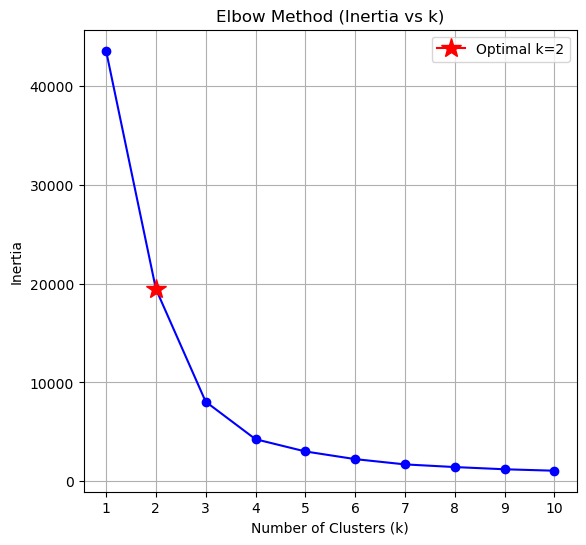

In [58]:
# Elbow Method and Silhouette Score Analysis
print("Determining optimal k...")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

# Visualization
plt.figure(figsize=(14, 6))
best_k = 2 

# Plot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
# Add star for optimal K
plt.plot(best_k, inertia[best_k-1], marker='*', color='red', markersize=15, label=f'Optimal k={best_k}')
plt.title('Elbow Method (Inertia vs k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.xticks(K_range)
plt.grid(True)

# Final run with k=2 (or chosen optimal)
print(f"Running final K-Means with k={best_k}...")
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_pca)
score_km = silhouette_score(X_pca, labels_km)
print(f"Silhouette Score (K-Means): {score_km:.4f}")

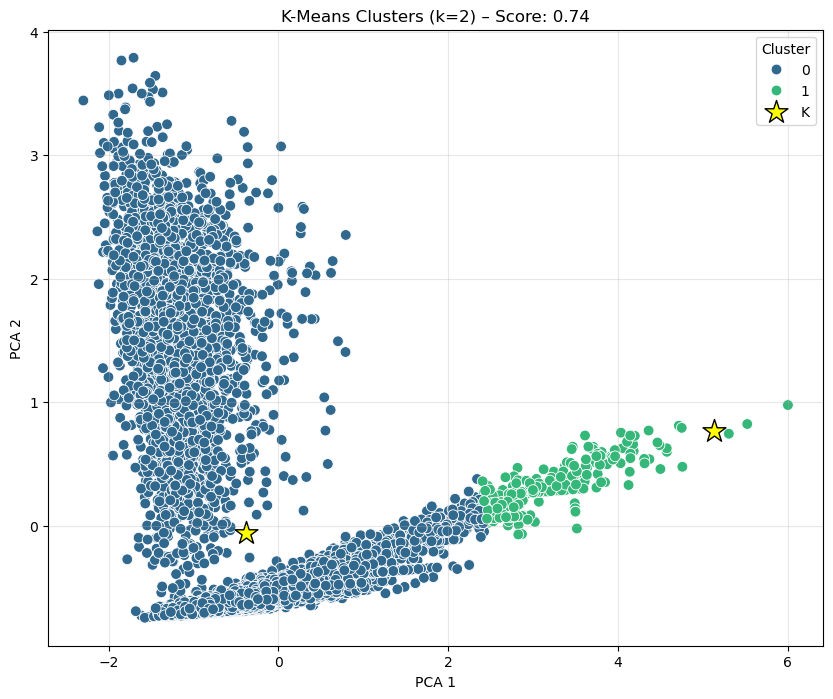

In [57]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_km,
    palette='viridis',
    s=60
)

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', edgecolors='black', label='K')

plt.title(f'K-Means Clusters (k=2) – Score: {score_km:.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()
